# Challenge description:
The challenge I am attempting is the on the customer satisfaction dataset. We would have to use the features of the training dataset with the "TARGET" column to predict the value of the "TARGET" column of the test dataset.

# Challenge link:
https://www.kaggle.com/competitions/santander-customer-satisfaction

# Dataset description and problem statement:
The dataset consists of mainly categorical features and is a binary classification problem. Therefore, we will use supervised machine learning algorithms (logistic regression) for this specific problem. As we have a labeled output in the training data, we will train our model with this data and try to predict an output for the "TARGET" column of the test dataset.

## dataset loading and initial look

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/train.csv")
df.head()
df.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
df.shape #total number of rows and columns for the dataset

(76020, 371)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)


Null values in the dataset:
ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


We check for null values and find none. We can see the class imbalance in the features from the histograms in the following. An outlier is a value of a feature that is outside the normal pattern. For example: for a feature that follows a linear pattern with all its values, any value that is far off that line is an outlier.

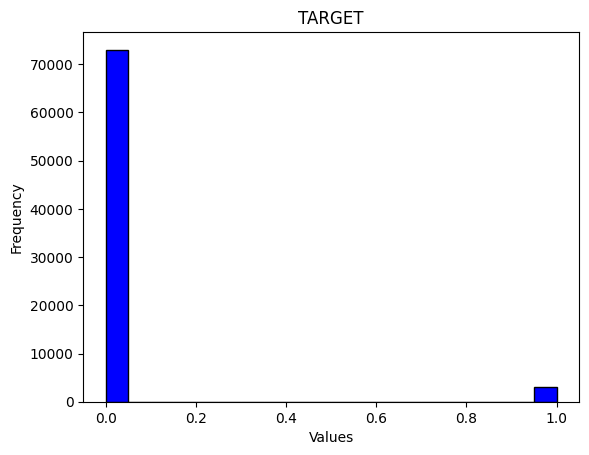

In [ ]:
column_name = 'TARGET'

# Generate the histogram
plt.hist(df[column_name], bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(column_name)

# Show the plot
plt.show()

we split the dataframe into two, one for the target column value 1 and one for target column value 0

In [5]:
df0=df[df['TARGET']==0]
df1=df[df['TARGET']==1]

In [ ]:
print(df0)


           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           1     2     23                 0.0                      0.0   
1           3     2     34                 0.0                      0.0   
2           4     2     23                 0.0                      0.0   
3           8     2     37                 0.0                    195.0   
4          10     2     39                 0.0                      0.0   
...       ...   ...    ...                 ...                      ...   
76015  151829     2     48                 0.0                      0.0   
76016  151830     2     39                 0.0                      0.0   
76017  151835     2     23                 0.0                      0.0   
76018  151836     2     25                 0.0                      0.0   
76019  151838     2     46                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0                          0.0          

In [ ]:
print(df1)

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
31         77     2     66                 0.0                     0.00   
80        159     2     45                 0.0                    26.97   
122       220     2     42                 0.0                     0.00   
162       303     2     31                 0.0                     0.00   
163       306     2     62                 0.0                     0.00   
...       ...   ...    ...                 ...                      ...   
75902  151601     2     30                 0.0                     0.00   
75917  151634     2     27                 0.0                   378.00   
75941  151679     2     26                 0.0                     0.00   
76000  151804     2     75                 0.0                     0.00   
76007  151811     2     61                 0.0                     0.00   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
31                        0.00          

(array([3.28238621e-02, 3.19401427e-02, 2.98781309e-02, 1.74639779e-02,
        8.54262052e-03, 3.66112308e-03, 1.26245623e-03, 6.73309992e-04,
        2.94573121e-04, 4.20818745e-05]),
 array([ 23. ,  30.9,  38.8,  46.7,  54.6,  62.5,  70.4,  78.3,  86.2,
         94.1, 102. ]),
 <BarContainer object of 10 artists>)

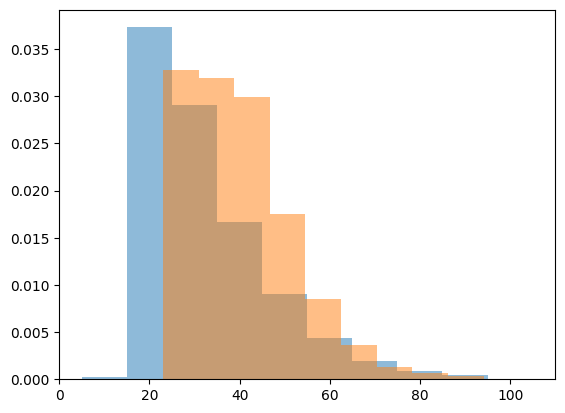

In [ ]:
plt.hist(df0['var15'], density=1, alpha=0.5)
plt.hist(df1['var15'], density=1, alpha=0.5)

In [ ]:
import matplotlib.pyplot as plt

def generate_histograms_comparison(df0, df1):

    num_columns = min(len(df0.columns), len(df1.columns))
    num_rows = min(65536 // (8 * num_columns), num_columns)
    fig, axs = plt.subplots(nrows=num_rows, ncols=1, figsize=(8, 3*num_rows))  # Adjusted height based on the number of rows

    for i in range(num_rows):
        column_name1 = df0.columns[i]
        column_name2 = df1.columns[i]

        axs[i].hist(df0[column_name1], bins=20, color='blue', density=1, alpha=0.5, label='DF1: '+column_name1)
        axs[i].hist(df1[column_name2], bins=20, color='orange', density=1, alpha=0.5, label='DF2: '+column_name2)

        axs[i].set_xlabel('Values')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title('Histograms of '+column_name1)
        axs[i].legend()

    plt.tight_layout()
    plt.show()


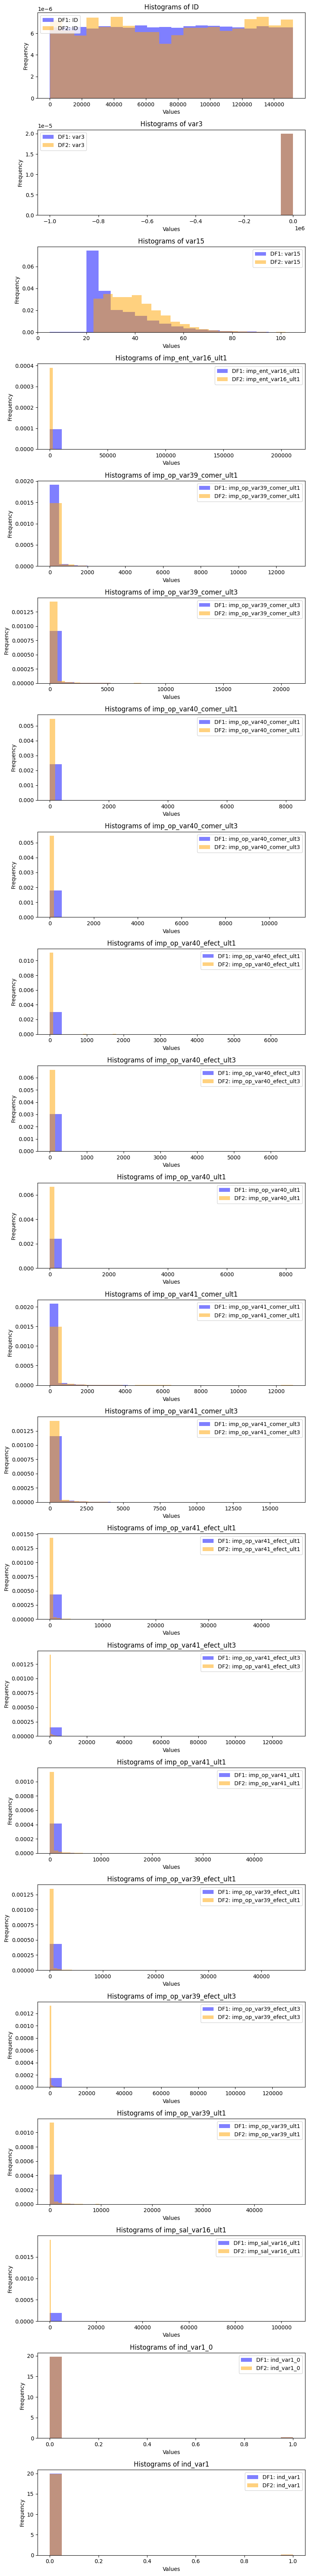

In [ ]:
generate_histograms_comparison(df0, df1)


In [ ]:
import math
import scipy

def compare_features_binary_1(train, df1, df0, logscale=False):
    print("Number of catogory 0:", df0.shape[0])
    print("Number of catogory 1:", df1.shape[0])

    # Make a grid of plots
    N_Features = df.shape[1]
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.floor(math.sqrt(N_Features))
    if N_X * N_Y < N_Features:
        N_Y += 1

    print("Found", N_Features, "features. Creating grid of", N_X, "by", N_Y)

    # Histogram Features
    plt.figure(figsize=(50, 50))

    for i,column in enumerate(df0.columns):
        KS_test=scipy.stats.kstest(df0[column],df1[column]).statistic
        print(column,"KS Distribution Similarity Test:", KS_test)

        plt.subplot(N_X,N_Y,i+1)
        plt.title((KS_test))
        if logscale:
            plt.yscale("log")
        plt.hist(df0[column],bins=100, histtype="step", color="red",label="0",density=1, stacked=True)
        plt.hist(df1[column],bins=100, histtype="step", color="blue",label="1",density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
    plt.subplots_adjust(hspace=1, wspace=1)
    plt.show()


Number of catogory 0: 3008
Number of catogory 1: 73012
Found 371 features. Creating grid of 20 by 19
ID KS Distribution Similarity Test: 0.02309575531740049
var3 KS Distribution Similarity Test: 0.00819921324503925
var15 KS Distribution Similarity Test: 0.360369918060686
imp_ent_var16_ult1 KS Distribution Similarity Test: 0.0054845072101233905
imp_op_var39_comer_ult1 KS Distribution Similarity Test: 0.013884904230257678
imp_op_var39_comer_ult3 KS Distribution Similarity Test: 0.014440336097476192
imp_op_var40_comer_ult1 KS Distribution Similarity Test: 0.0018601940689435548
imp_op_var40_comer_ult3 KS Distribution Similarity Test: 0.001730697722671093
imp_op_var40_efect_ult1 KS Distribution Similarity Test: 0.0032871126693250208
imp_op_var40_efect_ult3 KS Distribution Similarity Test: 0.003592166720480905
imp_op_var40_ult1 KS Distribution Similarity Test: 0.0022399589516617358
imp_op_var41_comer_ult1 KS Distribution Similarity Test: 0.012203983373179073
imp_op_var41_comer_ult3 KS Distri

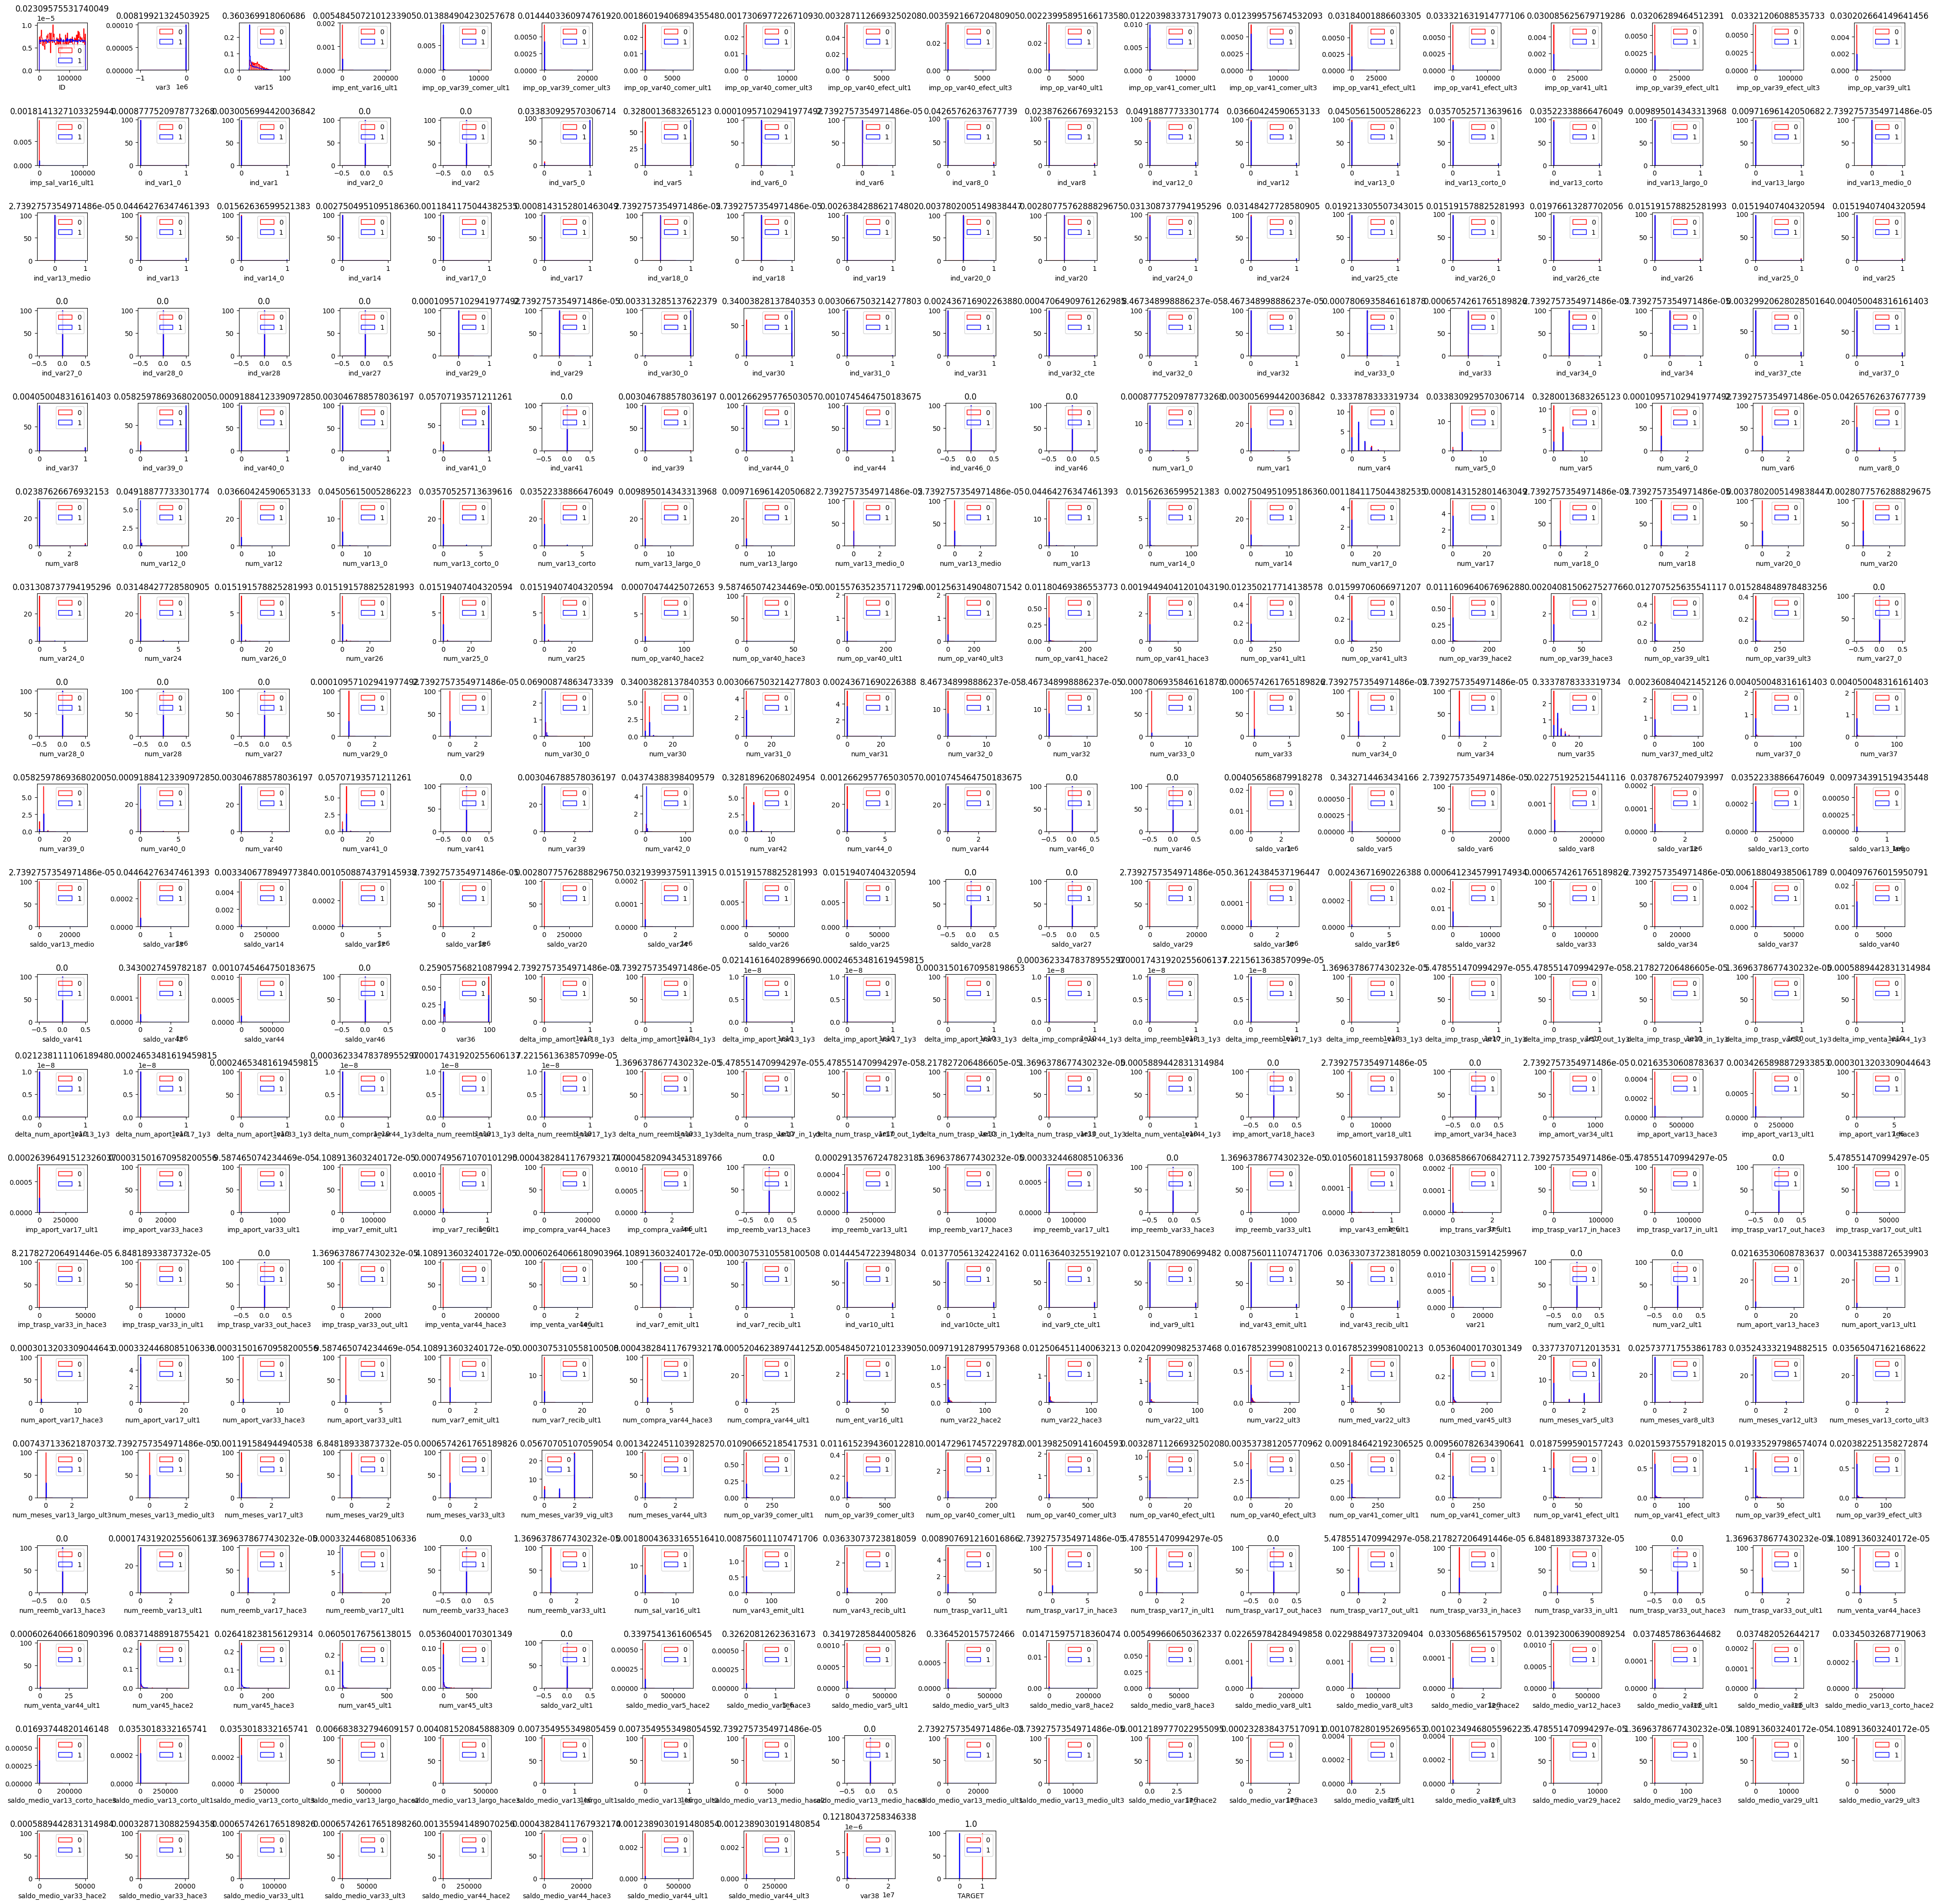

In [ ]:
compare_features_binary_1("/content/train.csv",df0,df1)

## From the histograms on the features, we can see that there is a significantly higher frequency of class 0 values in most features, this indicates that there is a class imbalance in the dataset. Therefore, we will be using feature importance in the following steps to figure out more important and effective features that we can use for our model.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_correlation_matrix(df0, df1):
    # Compute correlation matrices for each dataframe
    corr1 = df0.corr()
    corr2 = df1.corr()

    # Set up the matplotlib figure
    fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

    # Plot the correlation matrix for the first dataframe
    sns.heatmap(corr1, ax=axes[0], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    axes[0].set_title('Correlation Matrix - DataFrame 0')

    # Plot the correlation matrix for the second dataframe
    sns.heatmap(corr2, ax=axes[1], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    axes[1].set_title('Correlation Matrix - DataFrame 1')

    plt.tight_layout()
    plt.show()

# Example usage:
# compare_correlation_matrix(df1, df2)


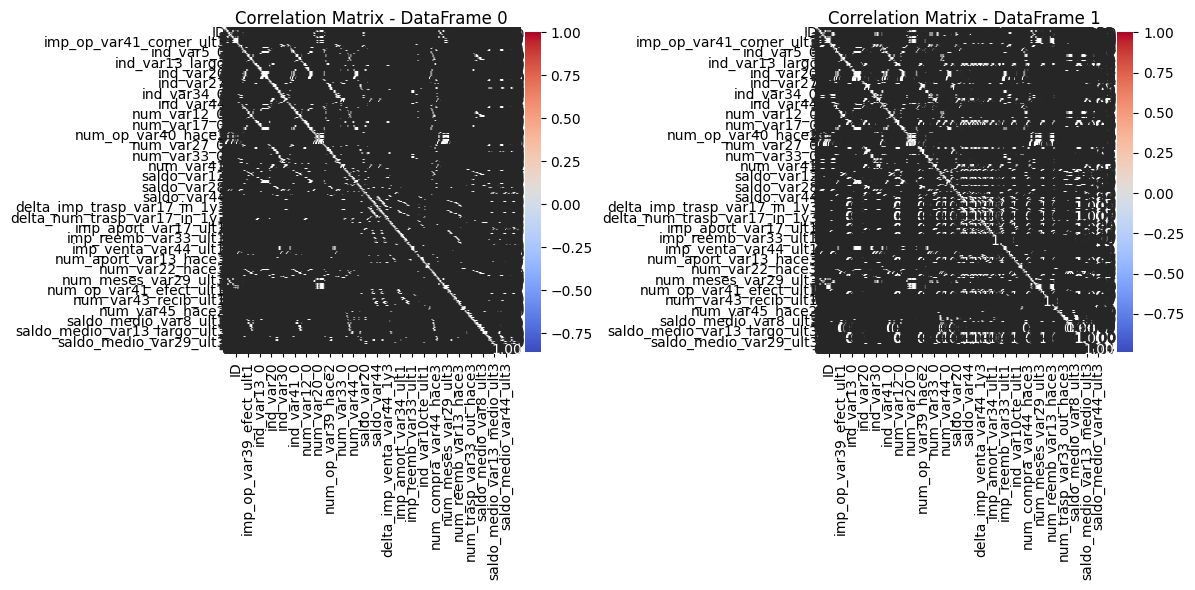

In [12]:
compare_correlation_matrix(df0,df1)

from these graphs we can see there is significant class imbalances on most features as well.

Now we can move onto machine learning, we use a Logistic Regression algorithm.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize PCA with the desired number of components
# Set n_components=None to keep all components
pca = PCA(n_components=None)

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Transform the data into the new feature space
transformed_data = pca.transform(scaled_data)

# Optionally, you can inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Optionally, you can inspect the principal components
principal_components = pca.components_

# Create a DataFrame for the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(transformed_data.shape[1])])

# Print the explained variance ratio and the principal components if desired
print("Explained Variance Ratio:", explained_variance_ratio)
print("Principal Components:", principal_components)
print(transformed_df)


Explained Variance Ratio: [8.03372785e-02 5.19905162e-02 3.62233557e-02 3.45820068e-02
 3.39427375e-02 3.10049944e-02 2.92383026e-02 2.80732961e-02
 2.59439574e-02 2.54606593e-02 2.24124059e-02 2.11958113e-02
 2.09876179e-02 2.03252246e-02 1.97661149e-02 1.74043357e-02
 1.62255643e-02 1.55112070e-02 1.38416372e-02 1.31471258e-02
 1.28483007e-02 1.22805297e-02 1.21688695e-02 1.17340667e-02
 1.06983260e-02 1.05403469e-02 1.02529955e-02 1.00481956e-02
 9.91847225e-03 9.58683571e-03 9.45727727e-03 9.29680286e-03
 9.09401314e-03 8.68718276e-03 8.41703992e-03 7.98512876e-03
 7.32157799e-03 7.11353531e-03 6.72615271e-03 6.62724379e-03
 6.43409099e-03 6.21763862e-03 6.20149754e-03 6.03679380e-03
 5.97175894e-03 5.95370186e-03 5.77866293e-03 5.73857328e-03
 5.66108586e-03 5.49299741e-03 5.18323566e-03 5.06312508e-03
 4.39216195e-03 4.31411429e-03 4.16581416e-03 4.09162844e-03
 4.04829382e-03 3.88031568e-03 3.80623621e-03 3.69086771e-03
 3.64287227e-03 3.54242085e-03 3.53342433e-03 3.29053522e-0

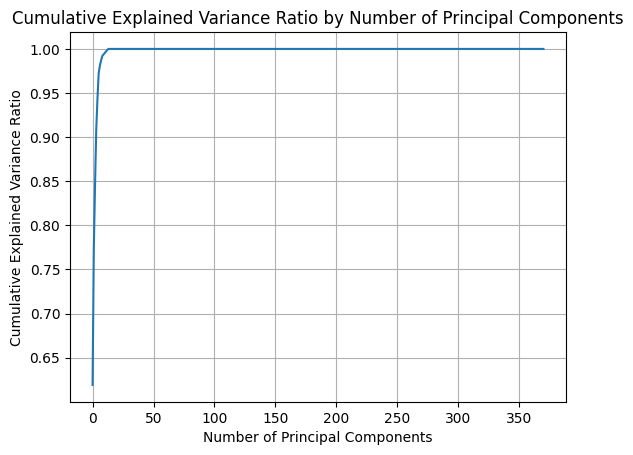

Number of principal components selected: 9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Fit PCA to the data
pca = PCA()
pca.fit(df)

#Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

#Select the number of principal components
desired_variance = 0.99
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1
print("Number of principal components selected:", num_components)

# Use the selected principal components
pca = PCA(n_components=num_components)
df_reduced = pca.fit_transform(df)




Since most of the data have a high cumulative variance ratio, thus dimensionalty reduction may be ineffective.

In [ ]:
print(df)

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           1     2     23                 0.0                      0.0   
1           3     2     34                 0.0                      0.0   
2           4     2     23                 0.0                      0.0   
3           8     2     37                 0.0                    195.0   
4          10     2     39                 0.0                      0.0   
...       ...   ...    ...                 ...                      ...   
76015  151829     2     48                 0.0                      0.0   
76016  151830     2     39                 0.0                      0.0   
76017  151835     2     23                 0.0                      0.0   
76018  151836     2     25                 0.0                      0.0   
76019  151838     2     46                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0                          0.0          

In [ ]:
# Try feature importance code

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with features and target
X = df.iloc[:, :-1]  # Features are all columns except the last one
y = df.iloc[:, -1]   # Target is the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training features and target
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Combine feature names and scores
feature_names_scores = zip(X_train.columns, feature_importances)

# Sort features by importance score in descending order
sorted_features = sorted(feature_names_scores, key=lambda x: x[1], reverse=True)

# Print feature names and scores
for feature, score in sorted_features:
    print(f"Feature: {feature}, Score: {score}")


Feature: ID, Score: 0.2506372910598965
Feature: var38, Score: 0.20553990868396815
Feature: var15, Score: 0.15087139494428903
Feature: saldo_medio_var5_ult3, Score: 0.023714521282656106
Feature: saldo_medio_var5_hace3, Score: 0.02200687684684284
Feature: num_var45_ult3, Score: 0.01827721442386233
Feature: saldo_medio_var5_hace2, Score: 0.014868820665289884
Feature: num_var45_hace3, Score: 0.014417280967359008
Feature: saldo_var30, Score: 0.013758588485665966
Feature: saldo_var42, Score: 0.01315719189718632
Feature: num_var45_hace2, Score: 0.013052422527163954
Feature: num_var22_ult3, Score: 0.012961302497852054
Feature: saldo_medio_var5_ult1, Score: 0.012691901789610998
Feature: saldo_var5, Score: 0.010568655962443607
Feature: num_var45_ult1, Score: 0.009743640717193613
Feature: num_med_var45_ult3, Score: 0.00923774210214915
Feature: num_var22_hace3, Score: 0.008974721128770857
Feature: num_var22_hace2, Score: 0.008953428247422025
Feature: var36, Score: 0.006918943897952149
Feature: num

 Since the ID column is unique to each input we cannot use it as an important feature. It is also irrelevant in determining whether the target variable is going to be 0 or 1.

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df0 and df1 are already defined and are subsets of the original dataframe
# Concatenate them back into a single dataframe
df = pd.concat([df0, df1])

# Separate the features and the target variable
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)  # liblinear is good for small datasets
model.fit(X_train, y_train)

# Predict the TARGET values for the test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")


Accuracy of the logistic regression model: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [99]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60816, 370) (60816,)
(15204, 370) (15204,)


In [124]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load training and test data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Define the specific features to be used
selected_features = ['var38','var15','saldo_medio_var5_ult3','saldo_medio_var5_hace3','num_var45_ult3']

# Split training data into features and target using the selected features
y_train = train_data['TARGET']  # Confirm 'TARGET' is the correct column name
X_train = train_data[selected_features]

# Train logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# Ensure the test data has the selected features
X_test = test_data[selected_features]

# Predict the TARGET values for the test data using the selected features
y_test_pred = model.predict(X_test)

# Output predictions
test_data['PREDICTED_TARGET'] = y_test_pred
print(test_data[['PREDICTED_TARGET']])



       PREDICTED_TARGET
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
75813                 0
75814                 0
75815                 0
75816                 0
75817                 0

[75818 rows x 1 columns]


# Accuracy of model on new data using a validation set

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.96


# Model Evaluation

##Using our validation set, we can evaluate our model by calculating precision, recall and the F1 score.

In [113]:
from sklearn.model_selection import train_test_split

# Split your original training data into new training data and a validation set
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train your model on the reduced training set
model.fit(X_train_part, y_train_part)

# Evaluate the model on the validation set using your preferred metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_val_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))


Accuracy: 0.9607037158829332
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


## As we can see, the precision, recall and F1 scores are 0 and aren't of much help. Since we do not have true labels for our test data, this method is not much use to us. Therefore, we can try using a ROC curve.


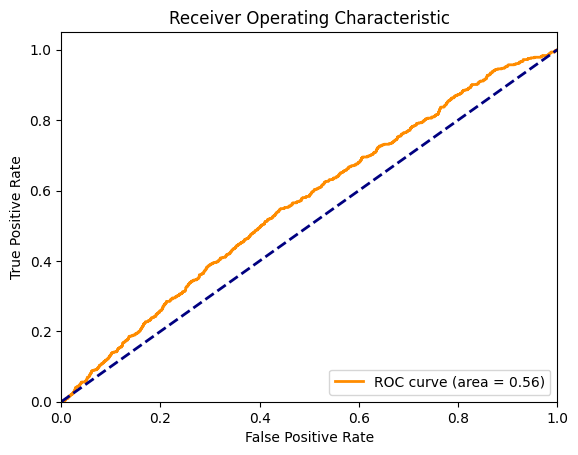

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and prepare your data
data = pd.read_csv('/content/train.csv')
y = data['TARGET']
X = data.drop('TARGET', axis=1)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the validation set
y_val_prob = model.predict_proba(X_val)[:, 1]

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Area of 0.56 indicates the model has below average performance.